<a href="https://colab.research.google.com/github/haaden/MSDS_422-Machine-Learning/blob/main/MSDS422_Assignment_07_20201022_v7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/djp840/MSDS_458_Public/blob/master/images/NorthwesternHeader.png?raw=1">

DATE: October 22, 2020

## MSDS422 Assignment 7
<div class="alert alert-block alert-success">
    <b>More Technical</b>: Throughout the notebook. This types of boxes provide more technical details and extra references about what you are seeing. They contain helpful tips, but you can safely skip them the first time you run through the code.
</div>

#### Microsoft Research Data License Agreement for Kaggle Cats and Dogs Dataset<br>
This Microsoft Research Data License Agreement (“Agreement”) is a legal agreement between you and Microsoft Corporation (or based on where you live, one of its affiliates). Please read them.  They apply to the Microsoft Research dataset named above, which may include any associated materials, text or speech files, associated media and “online” or electronic documentation and any updates we provide in our discretion (together, the “Dataset”). The terms also apply to any Microsoft (i) updates, (ii) supplements, (iii) internet-based services, and (iv) support services for this Dataset, unless other terms accompany those items. If so, those terms apply.
By agreeing to this Agreement and/or by using the Dataset, you accept these terms. If you do not accept them, do not use the Dataset. If you comply with these terms, you have the rights below.<br><br>
<b>SCOPE OF RIGHTS</b><br>
You may only use the Dataset:<br>
i. for non-commercial or research purposes only. Examples of non-commercial uses are teaching, academic research, public demonstrations and personal experimentation;<br>
ii. for analyzing and testing purposes; and<br>
iii. to publish (or present papers or articles) on your results from using such Dataset, provided that no material portion of the Dataset is included in any such publication or presentation.<br><br>
<b>DISCLAIMER OF WARRANTY</b><br>
The Dataset is licensed `as-is` You bear the risk of using it. Microsoft gives no express warranties, guarantees or conditions. You may have additional consumer rights or statutory guarantees under your local laws which this agreement cannot change. To the extent permitted under your local laws, Microsoft excludes the implied warranties of merchantability, fitness for a particular purpose and non-infringement.

In [ ]:
import cv2

In [ ]:
i = []
while(True):
    i.append('a')

In [ ]:
pip install plot_keras_history

In [ ]:
!pip install -q -U keras-tuner
import kerastuner as kt

In [ ]:
# Helper libraries
import os
import zipfile
import random
import datetime
from packaging import version
import numpy as np
from IPython.display import Image, display
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.image import imread

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from plot_keras_history import plot_history

In [ ]:
import zipfile
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

### Verify TensorFlow Version and Keras Version

In [ ]:
print("This notebook requires TensorFlow 2.0 or above")
print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >=2

This notebook requires TensorFlow 2.0 or above
TensorFlow version:  2.3.0


In [ ]:
print("Keras version: ", keras.__version__)

Keras version:  2.4.0


<div class="alert alert-block alert-info">
    <b>Suppress warning messages</b></div>

In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Mount Google Drive to Colab Environment

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


<div class="alert alert-block alert-success">
    <b>If the URL doesn't work:</b><br>https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765<br>
Dataset = 786.68 MiB 
</div>

### Load Cats vs Dogs Dataset

In [ ]:
#!wget --no-check-certificate \
 #   "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \-O "./data/cats-and-dogs.zip"

#local_zip = './data/cats-and-dogs.zip'
#zip_ref   = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('./data')
#zip_ref.close()

In [ ]:

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2020-11-02 01:11:03--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.41.6.166, 2600:1408:5c00:8a9::e59, 2600:1408:5c00:8b7::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.41.6.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M  93.5MB/s    in 9.5s    

2020-11-02 01:11:13 (82.9 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [ ]:
import os
os.path.abspath(os.getcwd())

'/content'

In [ ]:

print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))


12501
12501


<div class="alert alert-block alert-warning"><b>Expected Output:</b><br>
12501 images Cat<br>
12501 images Dog</div>

In [ ]:
try:
    os.mkdir('/tmp/cats_v_dogs')
    os.mkdir('/tmp/cats_v_dogs/training')
    os.mkdir('/tmp/cats_v_dogs/testing')
    os.mkdir('/tmp/cats_v_dogs/training/cats')
    os.mkdir('/tmp/cats_v_dogs/training/dogs')
    os.mkdir('/tmp/cats_v_dogs/testing/cats')
    os.mkdir('/tmp/cats_v_dogs/testing/dogs')
except OSError:
    pass

### Preprocessing the Examples

In [ ]:

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if (os.path.getsize(file) > 5):
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats_v_dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats_v_dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats_v_dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats_v_dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)


666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


<div class="alert alert-block alert-warning"><b>Expected Output:</b><br>
666.jpg is zero length, so ignoring<br>
11702.jpg is zero length, so ignoring<br></div>

In [ ]:
print(len(os.listdir('/tmp/cats_v_dogs/training/cats/')))
print(len(os.listdir('/tmp/cats_v_dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats_v_dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats_v_dogs/testing/dogs/')))

11250
11250
1250
1250


<b>Expected output:</b><br>
11250 - Training Cats<br>
11250 - Training Dogs<br>
1250 - Test Cats<br>
1250 - Test Dogs<br>

## Review Images

### Cat Images

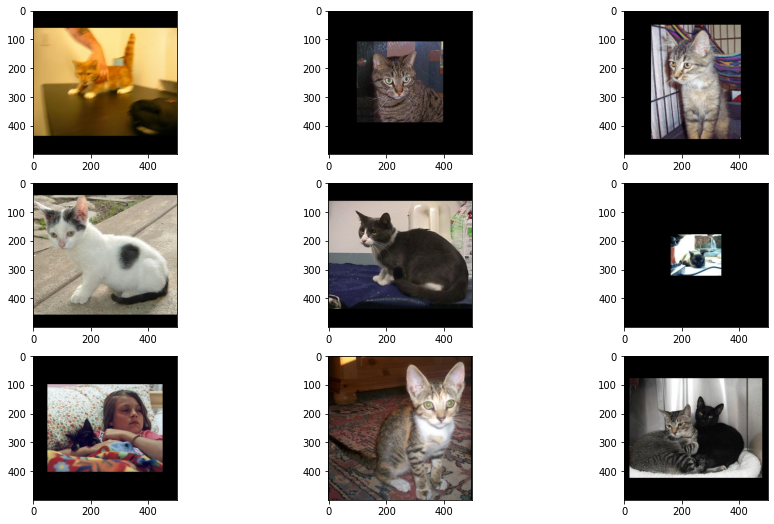

In [ ]:
fig = plt.figure(figsize = (15, 9))
Catfolder = '/tmp/PetImages/Cat/'
for i in range(9):
# define subplot
    pyplot.subplot(330 + 1 + i)
# define filename
    filename = Catfolder + str(i) + '.jpg'
# load image pixels
    image = imread(filename)
    image= tf.image.resize_with_crop_or_pad(image, 500, 500)
# plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

### Dog Images

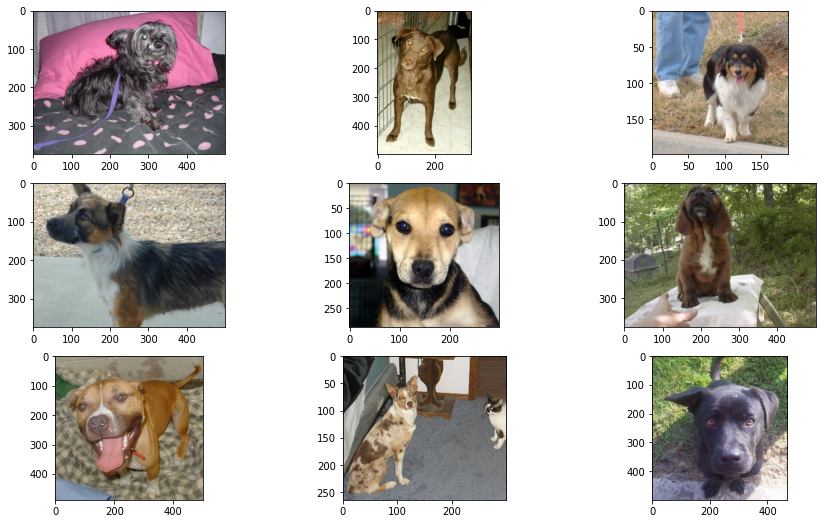

In [ ]:
fig = plt.figure(figsize = (15, 9))
Dogfolder = '/tmp/PetImages/Dog/'
for i in range(9):
# define subplot
    pyplot.subplot(330 + 1 + i)
# define filename
    filename = Dogfolder + str(i) + '.jpg'
# load image pixels
    image = imread(filename)
# plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [ ]:
del(model)

### Build CNN Model

In [ ]:
model = tf.keras.models.Sequential([

                       
    tf.keras.layers.Conv2D(32, (3, 3),padding="same", activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
     
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3),  activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(256, (3, 3),  activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(512, (3, 3),  activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
],name= 'best_CNN')

'best_CNN'

In [ ]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(16, (3, 3),  activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
     
       
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(448, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
], name= 'base')

In [ ]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(16, (3, 3),  activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
     
     
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(448, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
], name= 'base_Regularization')

In [ ]:
model.summary()

Model: "base_Regularization"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)

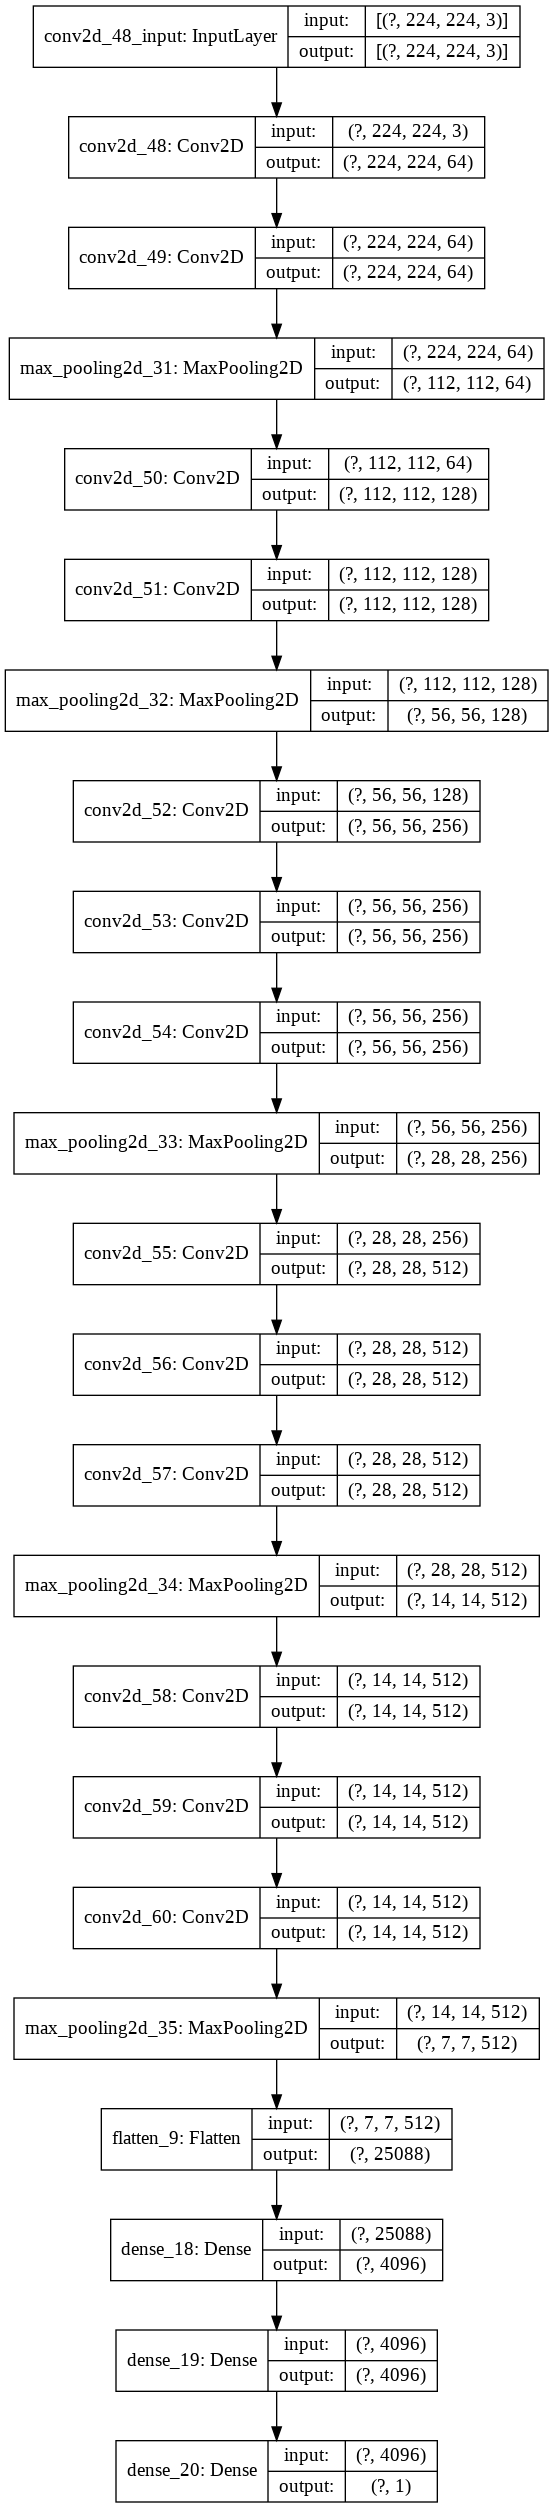

In [ ]:
keras.utils.plot_model(model, "MCVD_model.png", show_shapes=True)

### Compiling the model

In addition to setting up our model architecture, we also need to define which algorithm should the model use in order to optimize the weights and biases as per the given data. We will use stochastic gradient descent.

We also need to define a loss function. Think of this function as the difference between the predicted outputs and the actual outputs given in the dataset. This loss needs to be minimised in order to have a higher model accuracy. That's what the optimization algorithm essentially does - it minimises the loss during model training. For our multi-class classification problem, categorical cross entropy is commonly used.

Finally, we will use the accuracy during training as a metric to keep track of as the model trains.

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

### Optimizer that implements the Adam algorithm
<div class="alert alert-block alert-info">
https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam</div>

Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments<br>
According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters"

<div class="alert alert-block alert-info">
<b>tf.keras.preprocessing.image.ImageDataGenerator</b><br>
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator</div><br>
A DataFrame Iterator yielding tuples of (x, y) where x is a numpy array containing a batch of images with shape (batch_size, *target_size, channels) and y is a numpy array of corresponding labels. 

In [ ]:
pix_bins = np.zeros(256)
image_size = 224

cdf = pix_bins.cumsum()
cdf *= 255/cdf.max()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


In [ ]:
def img_transf(img):
    img = cv2.imread('wiki.jpg',0)

    hist,bins = np.histogram(img.flatten(),256,[0,256])

    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    return cdf_normalized

In [ ]:
TRAINING_DIR = "/tmp/cats_v_dogs/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.,validation_split=0.1,featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True #, preprocessing_function = img_transf
                     )
train_generator = train_datagen.flow_from_directory(TRAINING_DIR, classes=["cats","dogs"],
                                                    batch_size=250,
                                                    class_mode='binary',
                                                    target_size=(150, 150), subset='training'
                                                    ,shuffle=False
                                                    )

VALIDATION_DIR = "/tmp/cats_v_dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,classes=["cats","dogs"],
                                                              batch_size=250,
                                                              class_mode='binary',
                                                              target_size=(150, 150 ))

validation_generator_valid = train_datagen.flow_from_directory(
    TRAINING_DIR, # same directory as training data
  #  target_size=(img_height, img_width),
    batch_size=250,classes=["cats","dogs"],
    class_mode='binary',
    subset='validation',target_size=(150, 150 ), shuffle=False)


Found 20250 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
Found 2248 images belonging to 2 classes.


In [ ]:
train_generator.

<div class="alert alert-block alert-warning"><b>Expected Output:</b><br>
Found 22498 images belonging to 2 classes<br>
Found 2500 images belonging to 2 classes<br></div>

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


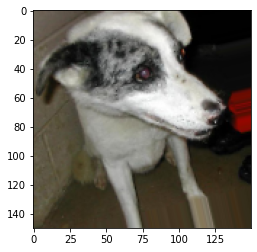

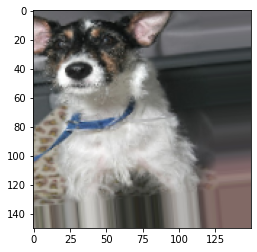

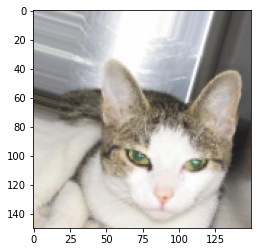

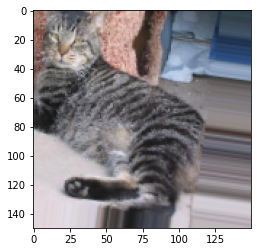

[1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]


In [ ]:
x,y = next(train_generator)
for i in range(0,4):
    image = x[i]
    plt.imshow(image)
  
    plt.show()
print(y)

### Flow From Directory 

<div class="alert alert-block alert-info">
<b>flow_from_directory - Default Parameters</b><br>
    flow_from_directory(<br>
    directory, target_size=(256, 256), color_mode='rgb', classes=None,
    class_mode='categorical', batch_size=32, shuffle=True, seed=None,
    save_to_dir=None, save_prefix='', save_format='png', follow_links=False,
    subset=None, interpolation='nearest'<br>
)<br>

Takes the path to a directory & generates batches of augmented data</div>

### Training the model

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=4, verbose=1, mode='auto')

In [ ]:
%%time
history2 = model.fit(train_generator, epochs=30
                    ,validation_data=validation_generator,
                    #,validation_steps=6
                    callbacks=EarlyStopping(monitor='val_acc')
                    
                   )

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/30
 9/81 [==>...........................] - ETA: 1:53 - loss: 0.2971 - acc: 0.8702

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

81/81 [==============================] - 151s 2s/step - loss: 0.3010 - acc: 0.8702 - val_loss: 0.3382 - val_acc: 0.8660
Epoch 2/30
81/81 [==============================] - 150s 2s/step - loss: 0.3088 - acc: 0.8683 - val_loss: 0.2860 - val_acc: 0.8820
Epoch 3/30
81/81 [==============================] - 149s 2s/step - loss: 0.2928 - acc: 0.8749 - val_loss: 0.3094 - val_acc: 0.8680
CPU times: user 7min 47s, sys: 10.3 s, total: 7min 57s
Wall time: 7min 36s


In [ ]:
model.evaluate(train_generator)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


23/81 [=======>......................] - ETA: 1:38 - loss: 0.3450 - acc: 0.8503

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

81/81 [==============================] - 141s 2s/step - loss: 0.3498 - acc: 0.8474


[0.34979432821273804, 0.8474074006080627]

In [ ]:
model.evaluate(validation_generator)

10/10 [==============================] - 6s 635ms/step - loss: 0.3094 - acc: 0.8680


[0.30938348174095154, 0.8679999709129333]

In [ ]:

model.evaluate(validation_generator_valid)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


9/9 [==============================] - 14s 2s/step - loss: 0.3948 - acc: 0.8230


[0.3947690427303314, 0.8229537606239319]

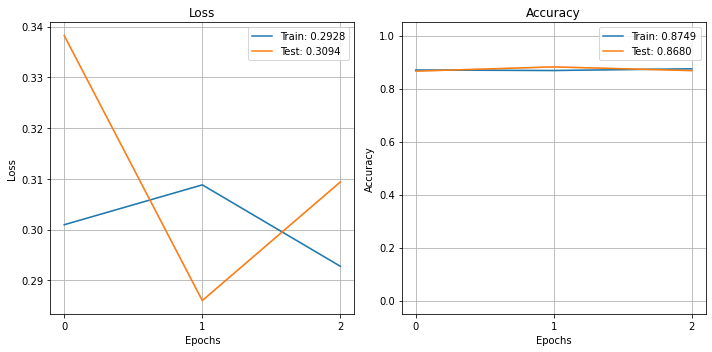

In [ ]:
plot_history(history2.history)

plt.show()

In [ ]:
history1 = model.fit(train_generator, epochs=30
                    ,validation_data=validation_generator
                    #,validation_steps=6
                    #,callbacks=[checkpoint,early]
                    
                   )

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/30


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

 2/81 [..............................] - ETA: 1:15 - loss: 0.2938 - acc: 0.8840

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(train_generator)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


39/81 [=============>................] - ETA: 1:13 - loss: 0.3459 - acc: 0.8513

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

81/81 [==============================] - 143s 2s/step - loss: 0.3434 - acc: 0.8502


[0.3434484899044037, 0.8501728177070618]

In [ ]:
model.evaluate(validation_generator)

10/10 [==============================] - 6s 634ms/step - loss: 0.3096 - acc: 0.8728


[0.30960211157798767, 0.8727999925613403]

In [ ]:

model.evaluate(validation_generator_valid)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


9/9 [==============================] - 15s 2s/step - loss: 0.3650 - acc: 0.8327


[0.36504390835762024, 0.8327401876449585]

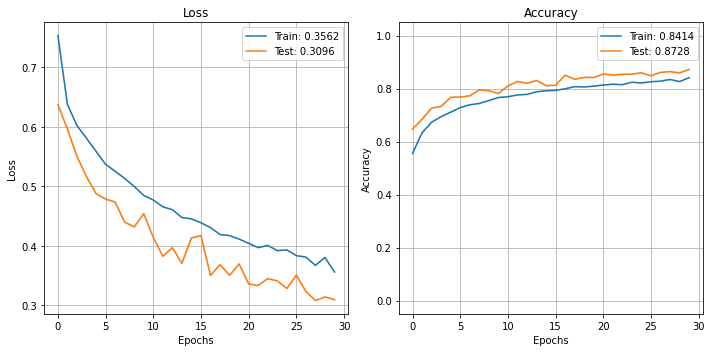

In [ ]:
plot_history(history1.history)

plt.show()

## Plotting Performance Metrics 

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
%%time
history = model.fit(train_generator, epochs=30
                    ,validation_data=validation_generator
                    #,validation_steps=6
                    ,callbacks=[checkpoint,early]
                    
                   )

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/30
33/81 [===========>..................] - ETA: 1:20 - loss: 0.7747 - acc: 0.5109

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

81/81 [==============================] - ETA: 0s - loss: 0.7326 - acc: 0.5237
Epoch 00001: val_acc did not improve from 0.93240
81/81 [==============================] - 147s 2s/step - loss: 0.7326 - acc: 0.5237 - val_loss: 0.7293 - val_acc: 0.5000
Epoch 2/30
81/81 [==============================] - ETA: 0s - loss: 0.6891 - acc: 0.5522
Epoch 00002: val_acc did not improve from 0.93240
81/81 [==============================] - 146s 2s/step - loss: 0.6891 - acc: 0.5522 - val_loss: 0.6939 - val_acc: 0.5320
Epoch 3/30
81/81 [==============================] - ETA: 0s - loss: 0.6746 - acc: 0.5835
Epoch 00003: val_acc did not improve from 0.93240
81/81 [==============================] - 149s 2s/step - loss: 0.6746 - acc: 0.5835 - val_loss: 0.6756 - val_acc: 0.5908
Epoch 4/30
81/81 [==============================] - ETA: 0s - loss: 0.6518 - acc: 0.6164
Epoch 00004: val_acc did not improve from 0.93240
81/81 [==============================] - 150s 2s/step - loss: 0.6518 - acc: 0.6164 - val_loss: 

In [ ]:
model.evaluate(validation_generator_valid)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


9/9 [==============================] - 15s 2s/step - loss: 0.1999 - acc: 0.9168


[0.19990457594394684, 0.916814923286438]

[0.5237036943435669,
 0.5522469282150269,
 0.583506166934967,
 0.61644446849823,
 0.6568394899368286,
 0.6912592649459839,
 0.730222225189209,
 0.7550617456436157,
 0.7759012579917908,
 0.8002963066101074,
 0.820839524269104,
 0.8346172571182251,
 0.8438024520874023,
 0.8493826985359192,
 0.8550617098808289,
 0.8655308485031128,
 0.8660246729850769,
 0.8769382834434509,
 0.8758024573326111,
 0.8840493559837341,
 0.8846913576126099,
 0.8876543045043945,
 0.8904197812080383,
 0.8949135541915894,
 0.8977283835411072,
 0.8998024463653564,
 0.8983703851699829,
 0.9020740985870361,
 0.9012345671653748,
 0.9074568152427673]

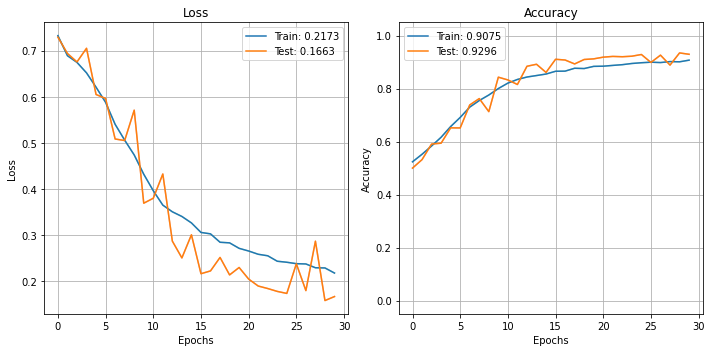

In [ ]:
plot_history(history.history)
plt.show()

## Plotting Performance Metrics 

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

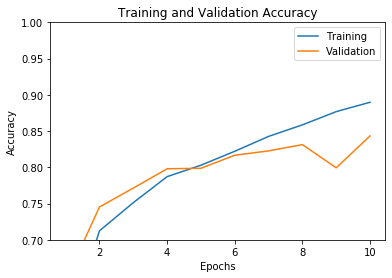

In [ ]:
plt.plot(range(1, len(acc) + 1), history.history['acc'], label = 'Training')
plt.plot(range(1, len(val_acc) + 1), history.history['val_acc'], label = 'Validation')
plt.ylim([0.7, 1.0])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

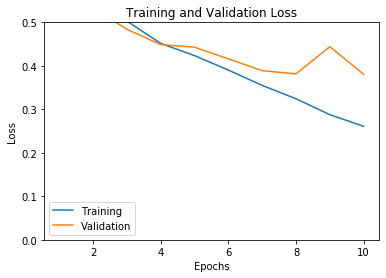

In [ ]:
plt.plot(range(1, len(loss) + 1), history.history['loss'], label = 'Training')
plt.plot(range(1, len(val_loss) + 1), history.history['val_loss'], label = 'Validation')
plt.ylim([0.0, 0.5])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(validation_generator, validation_generator)

In [ ]:
print('shape of preds: ', predictions.shape)

shape of preds:  (2500, 1)


A prediction is an array of numbers. They represent the model's "confidence" that the image corresponds to each of the 2 different classes of pets (Cats or Dogs)

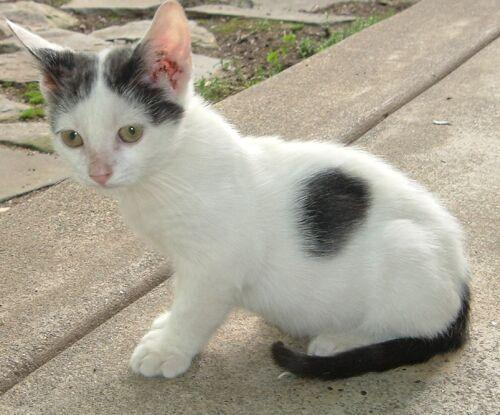

/tmp/PetImages/Cat/3.jpg


In [ ]:
listOfImageNames = ["/tmp/PetImages/Cat/3.jpg"]
for imageName in listOfImageNames:
    display(Image(filename=imageName))
    print(imageName)

In [ ]:
predictions[3]

array([0.02297717], dtype=float32)

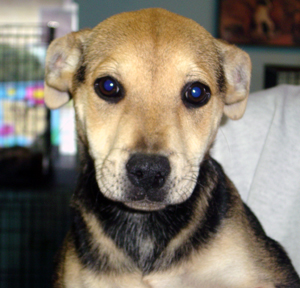

/tmp/PetImages/Dog/4.jpg


In [ ]:
listOfImageNames = ["/tmp/PetImages/Dog/4.jpg"]
for imageName in listOfImageNames:
    display(Image(filename=imageName))
    print(imageName)

In [ ]:
predictions[4]

array([4.4804057e-08], dtype=float32)

In [ ]:
listOfImageNames = ["/tmp/cats_v_dogs/testing/dogs/10011.jpg"]
for imageName in listOfImageNames:
    imageName = tf.image.rgb_to_grayscale(imageName)
    display(Image(filename=imageName))
    print(imageName)

ValueError: ignored

# model comparison


In [ ]:
import pandas as pd

In [ ]:
model_comp= pd.DataFrame({'Number of Conv2D': [3,3,5],
              'Number of Dense layer': [1,1,2],
              "Processing Time":['1h 16min 8s','1h 1min 26s','1h 19min 7s '],
              'Training Accuracy' :[85.02,84.74,92.85],
              'Test Accuracy': [87.28, 86.80, 91.68]
    

})
model_comp.index= ['Model 1','Model 2','Model 3']

model_comp

,Number of Conv2D,Number of Dense layer,Processing Time,Training Accuracy,Test Accuracy
Model 1,3,1,1h 16min 8s,85.02,87.28
Model 2,3,1,1h 1min 26s,84.74,86.80
Model 3,5,2,1h 19min 7s,92.85,91.68


In [ ]:
from sklearn.manifold import TSNE

In [ ]:
m = TSNE(learning_rate=5)

In [ ]:
tsne_features = m.fit_transform(predictions)

In [ ]:
x = tsne_features[:,0]
y = tsne_features[:,1]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


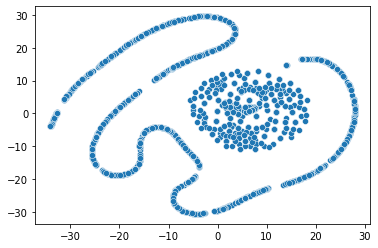

In [ ]:
import seaborn as sns

sns.scatterplot(x,y, data= train_generator)

In [ ]:
from keras import backend as K
import numpy as np

layer_of_interest=0
intermediate_tensor_function = K.function([model.layers[0].input],[model.layers[layer_of_interest].output])
intermediate_tensor = intermediate_tensor_function([X.iloc[0,:].values.reshape(1,-1)])[0]

NameError: ignored

In [ ]:
len(validation_generator_valid.labels)

2248

In [ ]:
len(testp)

20232

In [ ]:
filename = validation_generator_valid.labels
nb_samples = len(filename)

predict_1 = model.predict(validation_generator_valid)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


KeyboardInterrupt: ignored

In [ ]:
predicted_1 = np.where(model.predict(validation_generator_valid) > 0.50, 1, 0)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


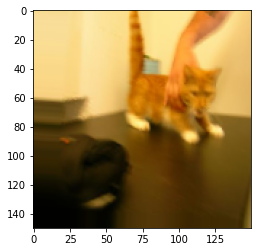

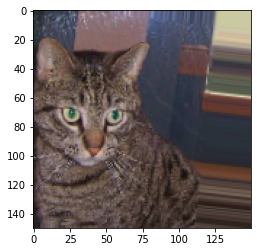

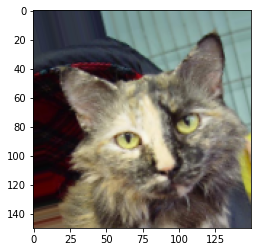

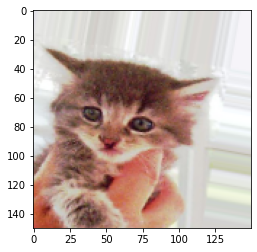

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
x,y = next(validation_generator_valid)
for i in range(0,4):
    image = x[i]
    plt.imshow(image)
  
    plt.show()
print(y)

In [ ]:
pred=model.predict_generator(validation_generator_valid,verbose=1,steps=2248/250)

Instructions for updating:
Please use Model.predict, which supports generators.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


9/8 [==============================] - 15s 2s/step


In [ ]:
predicted_class_indices=np.where(pred> 0.5,1,0)

In [ ]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())


In [ ]:
from sklearn.metrics import confusion_matrix

cm =confusion_matrix(predicted_class_indices,validation_generator_valid.labels )

In [ ]:
cm

array([[1016,   81],
       [ 108, 1043]])

[[1016   81]
 [ 108 1043]]


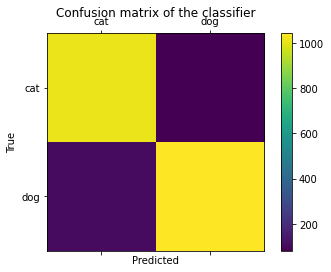

In [ ]:
labels = ['cat', 'dog']

print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from mlxtend.plotting import plot_confusion_matrix as pcm

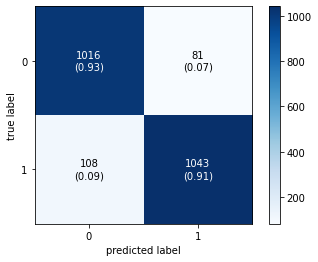

In [ ]:
fig, ax = pcm(conf_mat=cm, 
                               show_absolute=True,
                                show_normed=True,
                                colorbar=True,
              
                                )
plt.show()

In [ ]:

from sklearn.metrics import classification_report

In [ ]:
print(classification_report(predicted_class_indices,validation_generator_valid.labels))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1097
           1       0.93      0.91      0.92      1151

    accuracy                           0.92      2248
   macro avg       0.92      0.92      0.92      2248
weighted avg       0.92      0.92      0.92      2248



## model 1


In [ ]:
pred=model.predict_generator(validation_generator_valid, verbose=1, steps=2248/250) #steps=2248/250)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


9/8 [==============================] - 14s 2s/step


In [ ]:
predicted_class_indices=np.where(pred> 0.5,1,0)

20250

In [ ]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())


In [ ]:
from sklearn.metrics import confusion_matrix

cm =confusion_matrix(predicted_class_indices,validation_generator_valid.labels )

In [ ]:
cm

array([[8458, 1363],
       [1667, 8762]])

[[937 157]
 [187 967]]


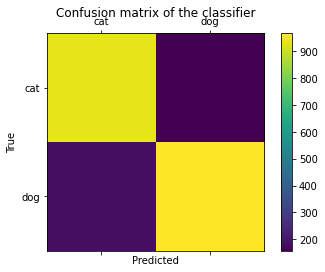

In [ ]:
labels = ['cat', 'dog']

print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from mlxtend.plotting import plot_confusion_matrix as pcm

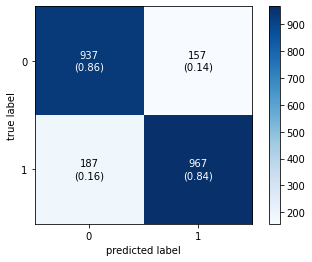

In [ ]:
fig, ax = pcm(conf_mat=cm, 
                               show_absolute=True,
                                show_normed=True,
                                colorbar=True,
              
                                )
plt.show()

In [ ]:

from sklearn.metrics import classification_report

In [ ]:
print(classification_report(predicted_class_indices,validation_generator_valid.labels))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1094
           1       0.86      0.84      0.85      1154

    accuracy                           0.85      2248
   macro avg       0.85      0.85      0.85      2248
weighted avg       0.85      0.85      0.85      2248



# model 2

In [ ]:
pred=model.predict_generator(train_generator, verbose=1,   steps=20250/250) # 

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


77/81 [===========================>..] - ETA: 6s

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

81/81 [==============================] - 137s 2s/step


In [ ]:
predicted_class_indices=np.where(pred> 0.5,1,0)

20250

In [ ]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())


In [ ]:
from sklearn.metrics import confusion_matrix

cm =confusion_matrix(predicted_class_indices,train_generator.labels )

In [ ]:
cm

array([[9739, 2720],
       [ 386, 7405]])

[[8458 1363]
 [1667 8762]]


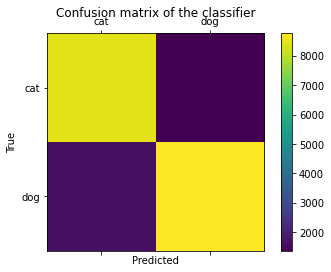

In [ ]:
labels = ['cat', 'dog']

print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from mlxtend.plotting import plot_confusion_matrix as pcm

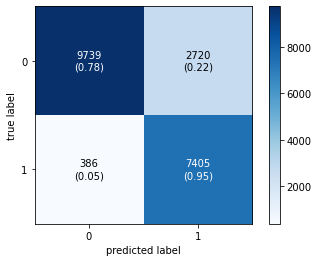

In [ ]:
fig, ax = pcm(conf_mat=cm, 
                               show_absolute=True,
                                show_normed=True,
                                colorbar=True,
              
                                )
plt.show()

In [ ]:

from sklearn.metrics import classification_report

In [ ]:
print(classification_report(predicted_class_indices, train_generator.labels))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86     12459
           1       0.73      0.95      0.83      7791

    accuracy                           0.85     20250
   macro avg       0.85      0.87      0.84     20250
weighted avg       0.87      0.85      0.85     20250



In [ ]:
# Plot trainingaccuracy values
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['accuracy'])
plt.plot(history['accuracy'])

plt.title('Model Accuracy (training data)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model 1', 'Model 2', 'Model 3', 'Model 4'])
plt.show()

# Plot training loss values
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history.history['loss'])

plt.title('Model loss (training data)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Model 1', 'Model 2', 'Model 3'])
plt.show()

NameError: ignored